<a href="https://colab.research.google.com/github/luisChambilla20/ss/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Te damos la bienvenida la segunda parte de este ejercicio de regresión.

## Este ejercicio continuará donde terminó el anterior, para esto es necesario

El primer paso es conseguir un dataset o conjunto de datos, para esto podemos recurrir al sitio Kaggle.com, el cual entre otras cosas ofrece datasets abiertos.

En este caso usaremos el dataset kc_house_data (https://www.kaggle.com/shivachandel/kc-house-data) ,el cual contiene datos de distintas casas en Washington, EEUU.

Puedes descargar el conjunto de datos desde este enlace:
https://drive.google.com/file/d/1sIwmhhn50utRZY556ENMAa13sIxWSzHj/view?usp=sharing

Una vez lo tengas descargado es importante que sepas donde lo dejaste guardado.

Esta segunda parte del ejercicio contiene todo lo de la primera, una vez llegues a una celda que dice "Comienza la segunda parte" es donde está todo lo nuevo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#¿Como ejecutar el código?

Toda celda de código en Google Colab tiene un botón de ejecutar arriba a la izquierda, cada vez que lo clickees se ejecutará todo el cógido de la celda.

In [2]:
#<---- Boton para correr este bloque de codigo

import pandas as pd
# Este codigo permite importar la libreria pandas, la cual sera util para manejar los datos
#"as pd" singifica que para usar funciones de pandas debemos escribir pd.nombre_de_funcion

from google.colab import files #estas dos lineas de codigo permiten subir el archivo vsc a Google Colab clickeando "examinar"
uploaded = files.upload()


import io # No preocuparse por esta linea, lo importante es que nos permite leer vsc que subimos
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))# esta linea se encagarga de contener df en el dataframe
# |
# |
# | Deberia aparecer un boton de "Examinar..." para subir el archivo con el dataset una vez ejecutes esta celda
# |
# ↓

Saving data.csv to data.csv


Antes de hacer cualquier otra cosa es importante examinar y entender el dataset, por eso se utilizaran algunas funciones de ejemplo. Como describe, head, shape y dtypes



In [4]:
df.describe() # la funcion describe nos muestra un buen resumen del dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.head() # la funcion head nos muestra los primeros 5 elementos del dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.shape # la funcion shape nos da la forma del dataset en este formato (Cantidad de filas, cantidad de columnas)

#Las cantidad de filas representa la cantidad de casas del dataset
#La cantidad de columnas representa la cantidad de atributos o datos que tiene cada casa del dataset

(4600, 18)

In [7]:
df.dtypes # la funcion dtypes nos muestra los tipos de variables del dataset, podemos ver que la mayoria son numeros enteros

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
correlations = df.corr()['price']

# la funcion corr nos permite obtener las correlaciones entre las distintas variables
# En este caso selecionamos del dataframe la variable "price" (precio), por lo cual
# obtendremos las relaciones entre esta variable y las demas
# Entre mas cercano a 1 sea el valor mayor es la correlacion y mejor es la variable para predecir "price"

print(correlations) # imprimimos los valores

#sqft_living (pies cuadrados de la vivienda) deberia dar el valor de mayor correlacion con el precio de la casa


price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


<ipython-input-8-40eb7df9b25e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['price']


Al igual que con el R2, entre más cercano a 1 sea el valor de correlación mejor.

Al usar la función shape la consola debería haber mostrado que el dataset contiene 21613, lo cual puede ser una cantidad incomoda para visualizar en gráficas como haremos más adelante. Por este motivo en el siguiente bloque de codigo vamos a "achicar el dataset", dejando solo 15 casas para analizar. Más adelante usaremos todo el dataset y podremos comparar resultados.

In [9]:
df_min = df.sample(15, random_state=10) #creamos un nuevo dataset al cual copiamos 15 valores del dataset original
# random_state=10 es un valor que deberias mantener igual si quieres obtener las mismas graficas, es basicamente la forma de asegurarse de que los 15 datos que seleccionamos sean los mismos
# si pongo otro valor como random state el conjunto de 15 datos seria diferente

from sklearn.linear_model import LinearRegression # Sklearn es la libreria de machine leaarning que estaremos usando, por ahora solo usaremos su funcion de Regresion lineal
X = df_min['sqft_living'].values.reshape(-1,1) # Definimos como X los valores de la columna que contiene el área de la vivienda en pies cuadrados
# ".values.reshape(-1,1)" es necesario para luego utilizar la funcion fit, es sencillamente algo relacionado a ajustar el formato del Array no te preocupes ahora por entender del todo su funcionamiento

y = df_min['price'].values.reshape(-1,1)  # Definimos como Y la columna que contiene los precios de las viviendas




Text(0.5, 0, 'Superficie en pies cuadrados')

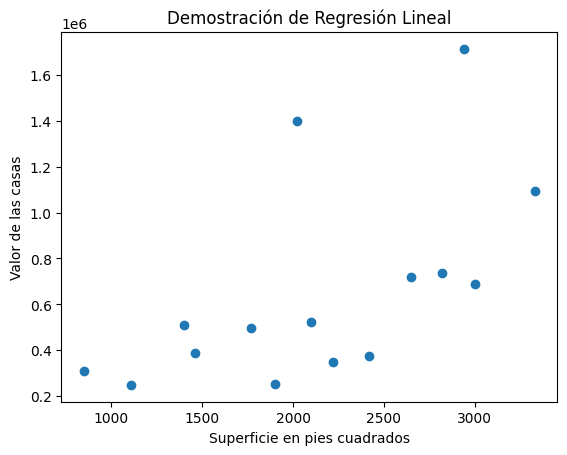

In [10]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar


# Ahora que tenemos un conjunto de datos mas pequeño deberia ser facil graficarlo

plt.scatter(X,y) # Genera una grafica de puntos

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

In [11]:
reg = LinearRegression().fit(X,y)
# La funcion fit relaciona los valores de X e y, mientras que Linear Regression calcula la recta
# la recta (y = mx + b) obtenida se guarda en la variable reg

Matematicamente, los valores obtenidos a través de la recta se representan matemáticamente así: *ŷ*, para diferenciarlo de la *y* común, la cual en este caso contiene los valores de precios. Como a *ŷ* se le suele decir "y con sombrero" (en inglés "hat" es "sombrero") llamaremos a la variable que contiene los valores predecidos y_hat, lo cual seria como llamarla y_con_sombrero

In [12]:
y_hat = reg.predict(X) # Sustituimos en la recta (y = mx + b) nuestros valores iniciales de X
print(y_hat) # guardamos los resultados en y_hat

[[ 642452.08098755]
 [ 953370.59047547]
 [ 932642.68984294]
 [ 832457.83678573]
 [ 891186.88857789]
 [ 683907.88225261]
 [ 400626.57360806]
 [ 210620.81780988]
 [ 528103.1624981 ]
 [ 614814.88014418]
 [1067374.04395438]
 [ 422390.86927221]
 [ 753000.88436103]
 [ 300441.72055084]
 [ 573359.07887912]]


Text(0.5, 0, 'Superficie en pies cuadrados')

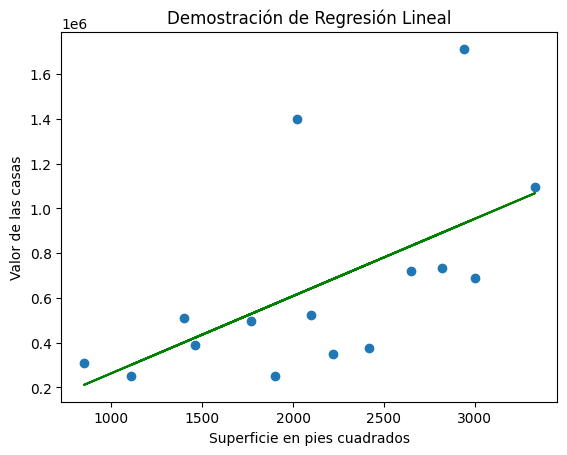

In [13]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y)
plt.plot(X, y_hat, color='green')

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

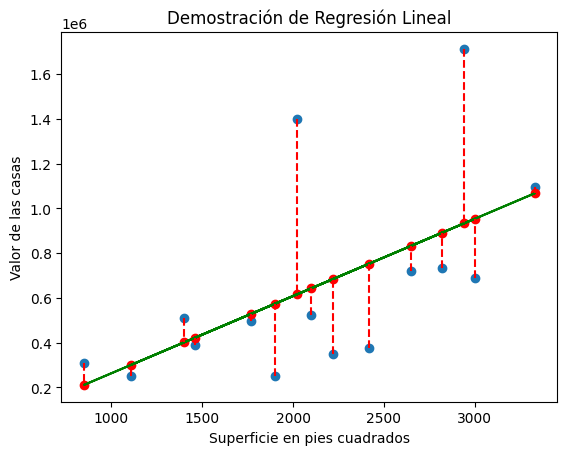

In [14]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y) # Grafica de dispersion, muestra los puntos iniciales

plt.scatter(X,y_hat, color='red')

# grafica de dispersion, muestra los puntos que se obtienen al sustituir nuestros valores iniciales de X en la ecuacion y = mx + b obtenida mediante regresion

plt.plot(X, y_hat, color='green') # Dibuja la linea de regresion


plt.title('Demostración de Regresión Lineal') # asigna titulo a la grafica
plt.ylabel('Valor de las casas') # asigna nombre al eje y de la grafica
plt.xlabel('Superficie en pies cuadrados') # asigna nombre al eje x de la grafica

# No preocuparse demasiado por esta parte, al igual que las otras graficas no es necesaria
# pero ayuda a visualizar que esta pasando

# Esto es un loop, el cual recorre todos los valores de los conjuntos X, y, y_hat
# a medida que los recorre va dibujando lineas punteadas para ilustrar el error de la regresion
for i in range(0, len(X)):
  point1 = [X[i], y[i]]
  point2 = [X[i], y_hat[i]]

  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]

  plt.plot(x_values, y_values, color='red', linestyle='dashed')



En este momento en la variable y tenemos los valores de precios originales, mientras que en y_hat tenemos los valores de precios obtenidos mediante la regresión lineal. Si comparamos la diferencia entre estos valores podemos obtener el R2 de la recta.


In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.3423457286372724

Al momento de escribir este texto el R2 obtenido es de 0.71610957246548, o sea, un gran modelo. :)
Pero es momento de recordar que de los miles de datos del dataset utilizamos solo 15. ¿Qué sucede si los usamos todos?

Text(0.5, 0, 'Superficie en pies cuadrados')

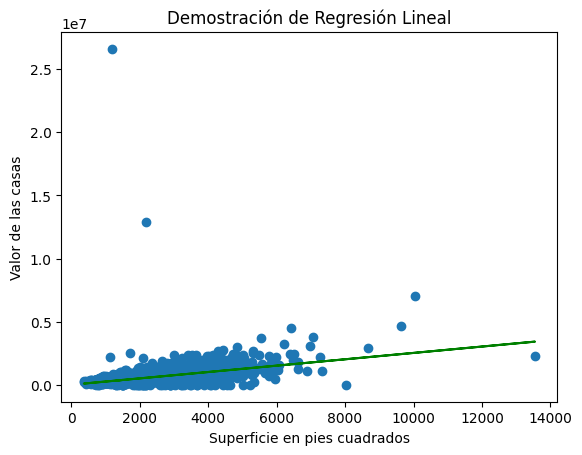

In [16]:
# Defino nuevos valores de X e y pero con un 1 al final para no repetir nombres de variables

X1 = df['sqft_living'].values.reshape(-1,1)
y1 = df['price']

# vuelvo a usar las herramientas de regresion

reg = LinearRegression().fit(X1,y1)
y_hat1 = reg.predict(X1)

# Y grafico nuevamente
plt.scatter(X1,y1)
plt.plot(X1, y_hat1, color='green')
plt.title('Demostración de Regresión Lineal')
plt.ylabel('Valor de las casas')
plt.xlabel('Superficie en pies cuadrados')

Ahora que tengo todos los datos la recta ya no parece tan representativa, ¿No?

Veamos su valor de R2

In [17]:
r2_score(y1, y_hat1)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.18525278999291528

El valor de R2 obtenido deberia ser de 0.4928532179037931, un valor mucho menor y no muy útil. ¿Por qué sucede esto?
La respuesta es bastante sencilla, con el primer conjunto de datos tuvimos "suerte" de que los pocos valores caian cerca de la recta. Pero al utilizar todos los datos del dataset se mostró que una recta que considera solo dos variables no es suficiente para predecir de forma adecuada el valor de las casas, resulta que hay muchos otros factores que afectan.

Al imprimir nuevamente las correlaciones podemos ver que hay otras variables que tienen una alta relación con la variable de precio, "bathrooms " tiene 0,52, "grade" tiene 0,66, "sqft_above" tiene 0,60. Todas estas variables también son importantes y no las estamos considerando. Por este motivo, en futuros ejercicios te mostraremos como hacer regresiones con múltiples variables.